# Zadanie domowe

W przypadku obrazów w odcieniach szarości pojedynczy piksel z zakresu [0; 255] reprezentowany jest jako 8-bitowa liczba bez znaku.
Pewnym rozszerzeniem analizy sposobu reprezentacji obrazu może być następujący eksperyment.
Załóżmy, że z każdego z 8 bitów możemy stworzyć pojedynczy obraz binarny (ang. _bit-plane slicing_).
Dla obrazka _100zloty.jpg_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg) stwórz 8 obrazów, z których każdy powinien zawierać jedną płaszczyznę bitową.
Podpowiedź $-$ warto sprawdzić, jak realizuje się bitowe operacje logiczne.
Zastosowanie takiej dekompozycji obrazu pozwala na analizę ,,ważności'' poszczególnych bitów.
Jest to użyteczne w kwantyzacji, ale także w kompresji.

W drugim etapie zadania proszę spróbować odtworzyć obraz oryginalny z mniejszej liczby obrazów binarnych.
Warto zacząć od dwóch najbardziej znaczących bitów, a później dodawać kolejne.
Należy utworzyć co najmniej trzy wersje zrekonstruowanych obrazów.
Podpowiedź $-$ rekonstrukcja obrazu to mnożenie przez odpowiednią potęgę liczby 2 (przesunięcie bitowe) oraz dodawanie.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import numpy as np

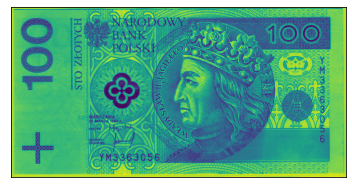

In [13]:
if not os.path.exists("100zloty.jpg"):
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg

I = cv2.imread('100zloty.jpg')
#I = cv2.cvtColor(I, cv2.COLOR_RGB2GRAY)

plt.imshow(I)
plt.xticks([]), plt.yticks([])
plt.show()

In [14]:
print(I[0][0])

233


In [15]:
print(list('{0:0b}'.format(I[0][0][0])))

IndexError: invalid index to scalar variable.

In [5]:
# conversion to binary arrays
Ibits = [[[list('{0:00b}'.format(rgb).rjust(8, '0')) for rgb in y] for y in x] for x in I]
print(len(I),len(Ibits))
print(len(I[0]),len(Ibits[0]))

847 847
1661 1661


In [6]:
print(Ibits[0][0][0])
print(type(Ibits[0][0][0][0]))

['1', '1', '1', '0', '1', '0', '0', '0']
<class 'str'>


In [7]:
imgs = []
for x in Ibits[0][0][0]:
    imgs.append(I.copy())

In [8]:
for i in range(len(imgs)):
    for x in range(len(imgs[i])):
        for y in range(len(imgs[i][x])):
            for c in range(len(imgs[i][x][y])):
                imgs[i][x][y][c] = int(Ibits[x][y][c][i]) * pow(2, i+1)

In [9]:
# im = I.copy()
# for x in range(len(I)):
#     for y in range(len(I[x])):
#         for c in range(len(I[x][y])):
#             im[x][y][c] = Ibits[x][y][c][3]
            
# plt.imshow(im)
# plt.xticks([]), plt.yticks([])
# # plt.show()

# im = I.copy()
# for x in range(500): # len(Ibits)
#     for y in range(1000): # len(Ibits[x])
#         for c in range(len(Ibits[x][y])):
#             print(x,y,c)
#             print(Ibits[x][y][c][7])
#             print(x, len(Ibits))
#             print(y, len(Ibits[x]))
#             print(c, len(Ibits[x][y]))
# plt.imshow(im)
# plt.xticks([]), plt.yticks([])
# plt.show()

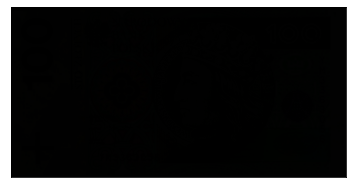

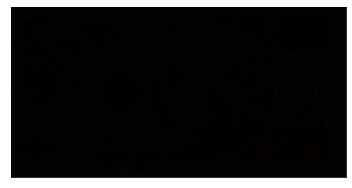

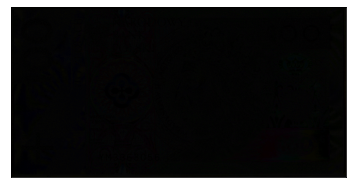

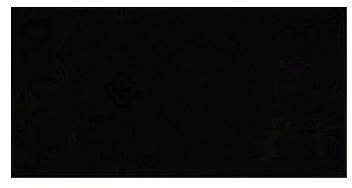

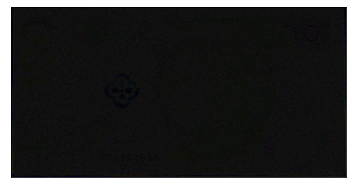

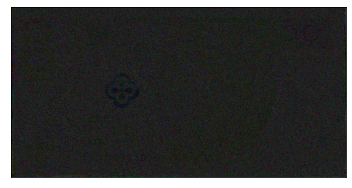

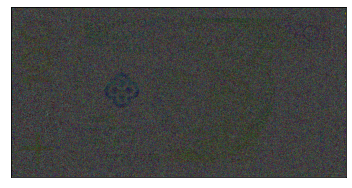

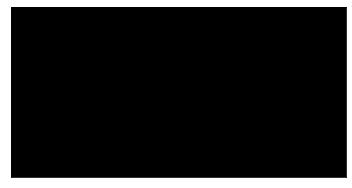

In [10]:
for i in imgs:
    plt.imshow(i)
    plt.xticks([]), plt.yticks([])
    plt.show()